In [73]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from keras.layers import Dense
from tensorflow.keras import Sequential
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from keras.models import load_model


In [25]:
import zipfile

local_file = 'cancer_data.zip'

zip_ref = zipfile.ZipFile(local_file, 'r')
zip_ref.extractall('data')
zip_ref.close()

In [26]:
# Load dataset from CSV
df = pd.read_csv('data/Cancer_Data.csv')  

# Menghapus kolom yang NaN (Unnamed: 32) dan yang tidak diperlukan (id)
df_clean = df.drop('Unnamed: 32', axis=1)
df_clean = df_clean.drop('id', axis=1)

# Mengubah isi pada kolom diagnosis dari M dan B menjadi 1 dan 0
df_clean['diagnosis'].replace('M',1,inplace=True)
df_clean['diagnosis'].replace('B',0,inplace= True)

df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [27]:
x = df_clean.iloc[:, 1:].values
y = df_clean.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 110)

In [46]:
model = Sequential()
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [47]:
model.compile(loss='binary_crossentropy', metrics=['binary_accuracy'], optimizer='adam')


In [50]:
history = model.fit(X_train,y_train,epochs=100,verbose=1, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
15/15 [==============================] - 0s 9ms/step - loss: 0.1535 - binary_accuracy: 0.9341 - val_loss: 0.1344 - val_binary_accuracy: 0.9474
Epoch 2/100
15/15 [==============================] - 0s 7ms/step - loss: 0.1651 - binary_accuracy: 0.9319 - val_loss: 0.2019 - val_binary_accuracy: 0.9123
Epoch 3/100
15/15 [==============================] - 0s 6ms/step - loss: 0.1529 - binary_accuracy: 0.9341 - val_loss: 0.1186 - val_binary_accuracy: 0.9561
Epoch 4/100
15/15 [==============================] - 0s 6ms/step - loss: 0.1123 - binary_accuracy: 0.9495 - val_loss: 0.1119 - val_binary_accuracy: 0.9474
Epoch 5/100
15/15 [==============================] - 0s 6ms/step - loss: 0.1094 - binary_accuracy: 0.9582 - val_loss: 0.1011 - val_binary_accuracy: 0.9649
Epoch 6/100
15/15 [==============================] - 0s 8ms/step - loss: 0.1222 - binary_accuracy: 0.9473 - val_loss: 0.1023 - val_binary_accuracy: 0.9561
Epoch 7/100
15/15 [==============================] - 0s 7ms/step - los

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


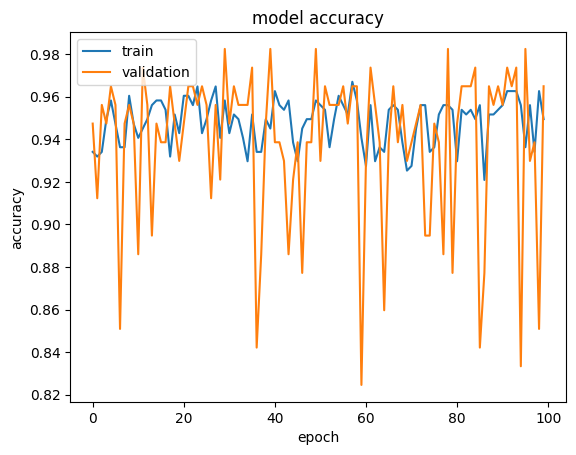

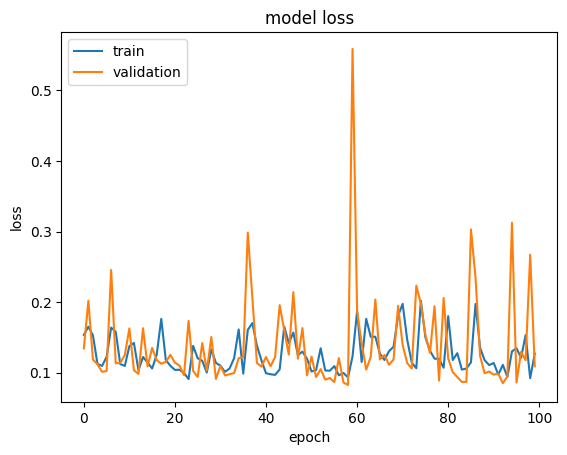

In [74]:
print(history.history.keys())

#  "Accuracy"
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [58]:
# Evaluasi model pada set pengujian
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Prediksi pada set pengujian
predictions = model.predict(X_test)

# Ubah prediksi menjadi label biner (0 atau 1)
binary_predictions = (predictions > 0.5).astype(int)

# Hitung metrik klasifikasi (misalnya, akurasi, presisi, recall)
print(f'Accuracy: {accuracy_score(y_test, binary_predictions)}')
print(f'Precision: {precision_score(y_test, binary_predictions)}')
print(f'Recall: {recall_score(y_test, binary_predictions)}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, binary_predictions))


4/4 [==============================] - 0s 2ms/step - loss: 0.1090 - binary_accuracy: 0.9649
Loss: 0.10897178202867508, Accuracy: 0.9649122953414917
4/4 [==============================] - 0s 1ms/step
Accuracy: 0.9649122807017544
Precision: 1.0
Recall: 0.9024390243902439
Confusion Matrix:
[[73  0]
 [ 4 37]]


In [67]:
# Menyimpan model ke dalam folder 'Save-Model'
model.save("Saved-Model/model.h5")

In [53]:
# Mendapatkan bobot dari model
weights = model.get_weights()

# Menampilkan bobot setiap layer
for i, layer_weights in enumerate(weights):
    print(f"Layer {i} weights shape: {layer_weights.shape}")

Layer 0 weights shape: (30, 1024)
Layer 1 weights shape: (1024,)
Layer 2 weights shape: (1024, 512)
Layer 3 weights shape: (512,)
Layer 4 weights shape: (512, 128)
Layer 5 weights shape: (128,)
Layer 6 weights shape: (128, 1)
Layer 7 weights shape: (1,)


In [64]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              31744     
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 622337 (2.37 MB)
Trainable params: 622337 (2.37 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [66]:
# Menghitung jumlah bobot (weight) 
# Per layer dihitung dengan input(fitur) dikali dengan output (neuron) ditambah dengan neuron bias
# Layer selanjutnya dihitung dengan mengambil layer sebelum dikali dengan neuron pada layer ini ditambah dengan neuron bias
# Total semua layer dijumlahkan = Total params 

total_params = model.count_params()
print(f'Total number of parameters (weights and biases) in the model: {total_params}')

Total number of parameters (weights and biases) in the model: 622337
